<h1>Instrument Discovery</h1>

In [1]:
%reset -f

import pandas as pd
from src.InstrumentDrivers.InstrumentConnection import InstrumentConnection as IC
from src.InstrumentDrivers.InstrumentDiscovery import InstrumentDiscovery
from src.InstrumentDrivers.DMM6500 import DMM6500
from src.InstrumentDrivers.CPX400DP import CPX400DP
from src.InstrumentDrivers.DAQ import Series
import time

ID = InstrumentDiscovery()

[0] USB0::0x05E6::0x6500::04612268::INSTR KEITHLEY INSTRUMENTS,MODEL DMM6500,04612268,1.7.12b


[2] ASRL11::INSTR THURLBY THANDAR, CPX400DP, 581772, 3.00-4.12




<h1>Measurement</h1>

In [2]:
MEAS_preambule = Series("MEAS preambule")
VDC_src_ser = Series("VDC src")
VDC_ser = Series("VDC")

VDC_src_ser = Series('VDC src')
VDC_ser = Series('VDC')

# MULTIMETER TEST
with IC(ID.get_instrument_address(0), ID.connection_handler) as multi_con, DMM6500(multi_con) as multi, \
    IC(ID.get_instrument_address(2), ID.connection_handler) as src_con, CPX400DP(src_con) as src:
    src.out_on(1)
    time.sleep(1)
    for voltage in range(21):
        src.set_voltage(1, voltage)
        time.sleep(1)
        VDC_src_ser.add_data_point(voltage)
        VDC_ser.add_data_point(multi.acquire_measurement())

df = pd.concat([pd.Series(VDC_src_ser, name="VDC src"), pd.Series(VDC_ser, name="VDC")], axis=1)
df

-> Switching OUT1 on
-> Remote lock released
-> Switching OUT1 off
OUT1 Limits [
+ Output reached set voltage limit
]
-> Switching OUT2 off
OUT2 Limits [
]
-> Connection to instrument closed
-> Remote lock released
-> Connection to instrument closed


,VDC src,VDC
0,0,3.435800E-01
1,1,1.001792E+00
2,2,2.003965E+00
3,3,3.005003E+00
4,4,4.007039E+00
5,5,5.008269E+00
6,6,6.009540E+00
7,7,7.010454E+00
8,8,8.010544E+00
9,9,9.010673E+00


<h1>Visualization</h1>

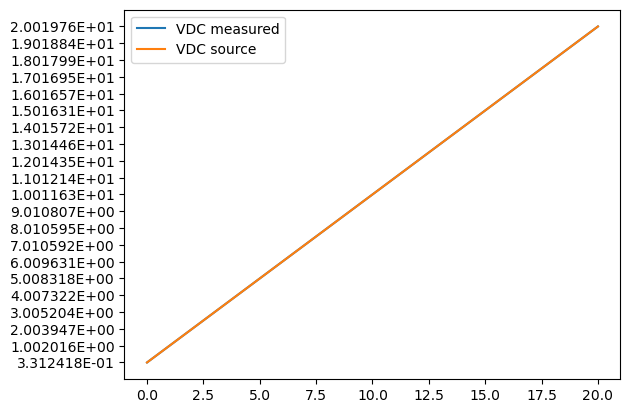

In [8]:
import matplotlib.pyplot as plt

plt.plot(df["VDC"], label='VDC measured')
plt.plot(df["VDC src"], label='VDC source')
plt.legend()

plt.show()

<h1>Termination</h1>

In [10]:
del ID

-> Resources successfully released
